<a href="https://colab.research.google.com/github/muhammadtarek98/deep-learning-curve-A.I-solutions-internship/blob/main/CNNs_weather_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
import tensorflow
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import utils
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
import os
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
def image_reader(dir):
  lst=[]
  for image in os.listdir(dir):
    if "png" in image or "jpg" in image or "jpeg" in image or "PNG" in image or "JPG" in image or "JPEG" in image:
          img=cv.imread(dir+image)
          try:
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(100,100))
          except:
            print(image)
          lst.append(img)
  return np.array(lst)
def data_set_1(dir):
  #dataset=np.array([])
  data_set=dict()
  cloudy=image_reader(dir+"cloudy/")
  rain=image_reader(dir+"rain/")
  shine=image_reader(dir+"shine/")
  sunrise=image_reader(dir+"sunrise/")
  data_set[1]=sunrise#sunrise
  data_set[2]=cloudy#cloudy
  data_set[3]=shine#shine
  data_set[4]=rain#rain  
  dataset=np.concatenate((sunrise,cloudy,shine,rain))
  #del cloudy_lst,rain_lst,shine_lst,sunrise_lst
  return data_set,dataset

In [ ]:
training_data_set_dict,training_data_set_lst=data_set_1("/content/drive/MyDrive/task_3_dataset/data_set_1/")
print(training_data_set_dict.keys())

dict_keys([1, 2, 3, 4])


In [ ]:
def show(class_name,class_num):
  print(class_name)
  for i in range(0,10):
    plt.imshow(training_data_set_dict[class_num][i],cmap="gray")
    plt.show()
    print(training_data_set_dict[class_num][i].shape)

sunrise


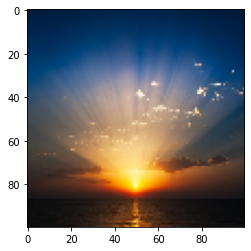

(100, 100, 3)


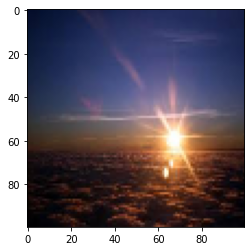

(100, 100, 3)


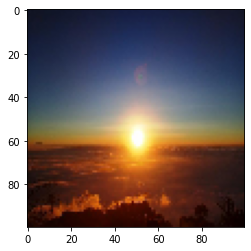

(100, 100, 3)


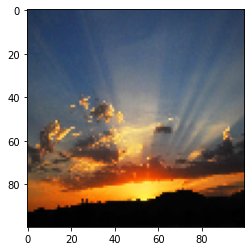

(100, 100, 3)


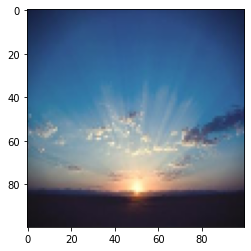

(100, 100, 3)


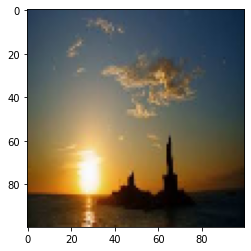

(100, 100, 3)


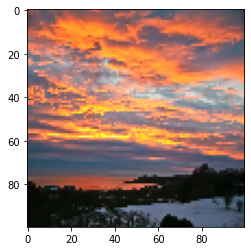

(100, 100, 3)


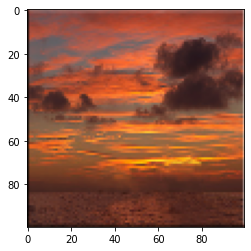

(100, 100, 3)


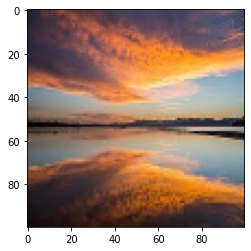

(100, 100, 3)


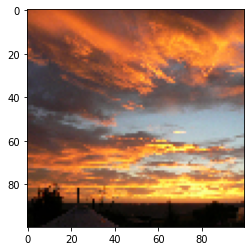

(100, 100, 3)


In [ ]:
show("sunrise",1)

cloudy


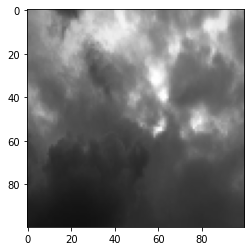

(100, 100, 3)


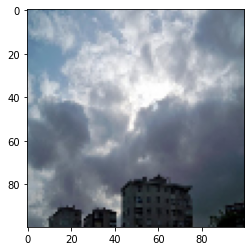

(100, 100, 3)


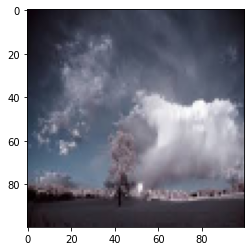

(100, 100, 3)


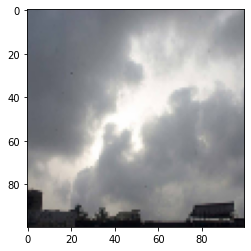

(100, 100, 3)


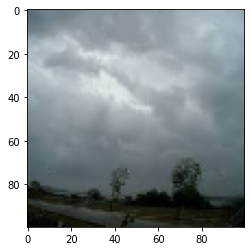

(100, 100, 3)


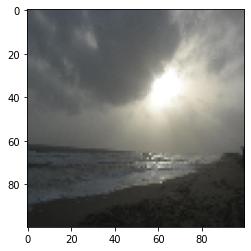

(100, 100, 3)


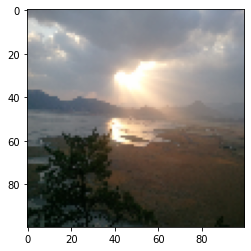

(100, 100, 3)


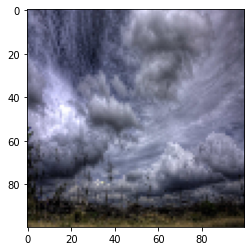

(100, 100, 3)


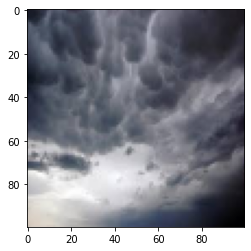

(100, 100, 3)


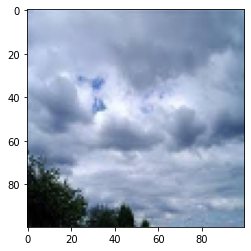

(100, 100, 3)


In [ ]:
show("cloudy",2)

shine


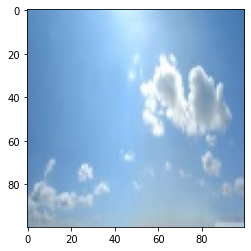

(100, 100, 3)


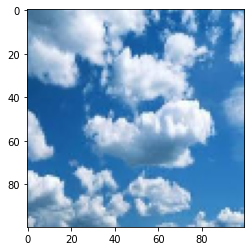

(100, 100, 3)


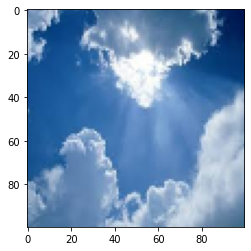

(100, 100, 3)


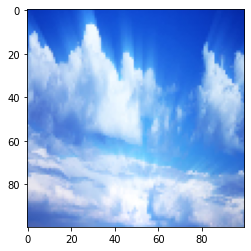

(100, 100, 3)


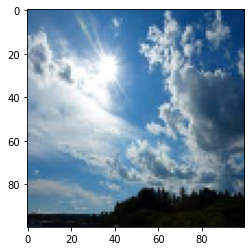

(100, 100, 3)


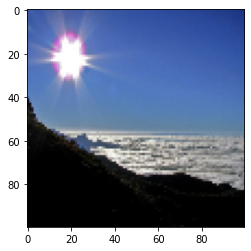

(100, 100, 3)


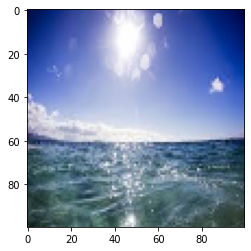

(100, 100, 3)


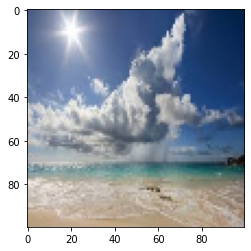

(100, 100, 3)


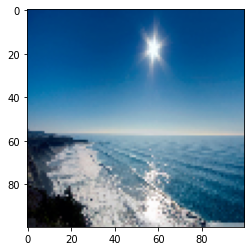

(100, 100, 3)


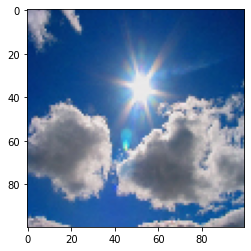

(100, 100, 3)


In [ ]:
show("shine",3)

rain


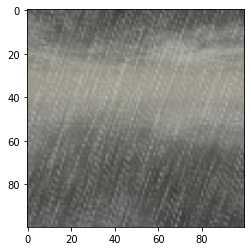

(100, 100, 3)


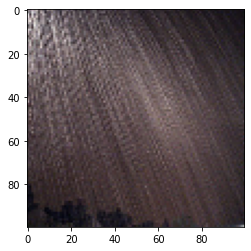

(100, 100, 3)


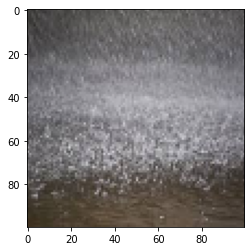

(100, 100, 3)


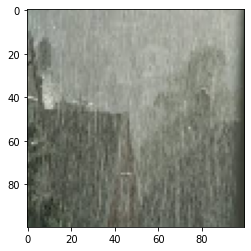

(100, 100, 3)


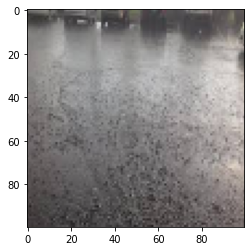

(100, 100, 3)


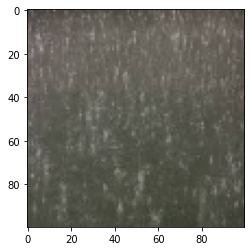

(100, 100, 3)


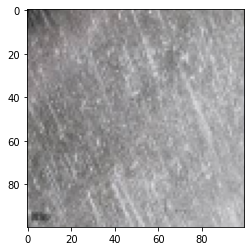

(100, 100, 3)


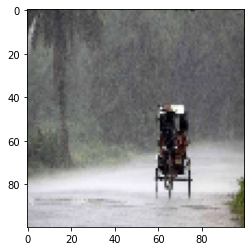

(100, 100, 3)


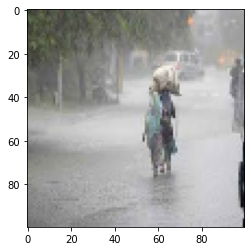

(100, 100, 3)


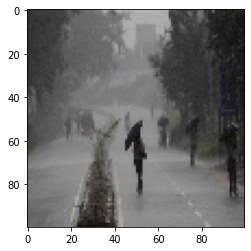

(100, 100, 3)


In [ ]:
show("rain",4)

In [ ]:
print(training_data_set_lst.shape)

(1123, 100, 100, 3)


In [ ]:
counter_1=len(training_data_set_dict[1])
counter_2=len(training_data_set_dict[2])
counter_3=len(training_data_set_dict[3])
counter_4=len(training_data_set_dict[4])

In [ ]:
print(counter_1)
print(counter_2)
print(counter_3)
print(counter_4)

357
300
252
214


In [ ]:
"""TRAINING_DIR = '/content/drive/MyDrive/task_3_dataset/data_set_1/'
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(100,100),
                                                    shuffle=True,
                                                    batch_size=1
                                                   )
train_generator.image_data_generator"""

In [ ]:
from sklearn.utils import shuffle
TRAINING_DIR = '/content/drive/MyDrive/task_3_dataset/data_set_1/'
train_datagen2 = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen2.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(100,100),
                                                    shuffle=True,
                                                  subset="training",
                                                 )


validation_generator = train_datagen2.flow_from_directory(
    TRAINING_DIR, # same directory as training data
    target_size=(100,100),
    class_mode='categorical',
    subset='validation',
    shuffle=False) # set as validation data

Found 900 images belonging to 4 classes.
Found 223 images belonging to 4 classes.


In [ ]:
def model_architecture():
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=2, padding='same',activation='relu', input_shape=(100,100,3)))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
#  model.add(Conv2D(filters=64, kernel_size=2, padding='same',  activation='relu'))
#  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(20000, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(15000, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2304, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1152, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(576, activation='relu'))
  model.add(Dense(288, activation='relu'))
  model.add(Dense(144, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  return model

In [ ]:
model_1=model_architecture()
#model_2=model_architecture()
model_1.summary()

In [ ]:
utils.plot_model(model_1,show_shapes=True)

In [ ]:
weight_class={
    0:1123/(4*counter_1),
    1:1123/(4*counter_2),
    2:1123/(4*counter_3),
    3:1123/(4*counter_4)
}

In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-3,beta_1=0.9,beta_2=0.99,epsilon=1e-9),
              metrics=['accuracy',
                       tensorflow.keras.metrics.Precision(),
                       tensorflow.keras.metrics.Recall(),
                       tfa.metrics.F1Score(num_classes=4)])

In [ ]:
history_1=model_1.fit(train_generator,
                  validation_data =validation_generator,
                  epochs=10,
                  batch_size=32,
                  use_multiprocessing=True,
                  shuffle=True,
                  class_weight=weight_class)

Epoch 1/10
29/29 [==============================] - 68s 2s/step - loss: 0.3008 - accuracy: 0.8911 - precision_3: 0.9061 - recall_3: 0.8789 - f1_score: 0.8801 - val_loss: 0.6464 - val_accuracy: 0.7937 - val_precision_3: 0.8341 - val_recall_3: 0.7668 - val_f1_score: 0.7748
Epoch 2/10
29/29 [==============================] - 67s 2s/step - loss: 0.3726 - accuracy: 0.8667 - precision_3: 0.8901 - recall_3: 0.8456 - f1_score: 0.8528 - val_loss: 0.6101 - val_accuracy: 0.7937 - val_precision_3: 0.8434 - val_recall_3: 0.7489 - val_f1_score: 0.7765
Epoch 3/10
29/29 [==============================] - 67s 2s/step - loss: 0.4417 - accuracy: 0.8278 - precision_3: 0.8584 - recall_3: 0.7878 - f1_score: 0.8112 - val_loss: 0.5522 - val_accuracy: 0.7758 - val_precision_3: 0.8621 - val_recall_3: 0.6726 - val_f1_score: 0.7633
Epoch 4/10
29/29 [==============================] - 68s 2s/step - loss: 0.3867 - accuracy: 0.8578 - precision_3: 0.9111 - recall_3: 0.8089 - f1_score: 0.8364 - val_loss: 0.9956 - val_a

In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.00001),
              metrics=['accuracy',
                       tensorflow.keras.metrics.Precision(),
                       tensorflow.keras.metrics.Recall(),
                       tfa.metrics.F1Score(num_classes=4)])

In [ ]:
history_2=model_2.fit(train_generator,
                  validation_data =validation_generator,
                  epochs=200,
                  use_multiprocessing=True,
                  batch_size=64,
                  shuffle=True,
                 )

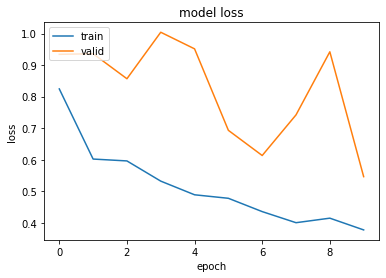

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

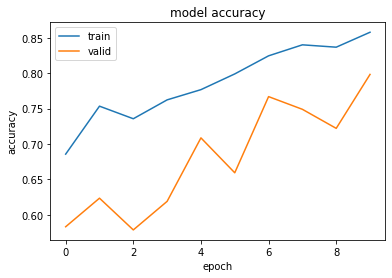

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
num_of_test_samples=223 
Y_pred = model_1.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ["sunrise","cloudy","shine","rain"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 8  8 25 19]
 [ 4  8 19 11]
 [ 6 11 19 14]
 [ 9 14 26 22]]
Classification Report
              precision    recall  f1-score   support

     sunrise       0.30      0.13      0.18        60
      cloudy       0.20      0.19      0.19        42
       shine       0.21      0.38      0.27        50
        rain       0.33      0.31      0.32        71

    accuracy                           0.26       223
   macro avg       0.26      0.25      0.24       223
weighted avg       0.27      0.26      0.25       223

